## Bank Marketing
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.
Moro, S., Rita, P., & Cortez, P. (2014). Bank Marketing [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.

#### Exploratory Data Analysis (EDA)

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("data/bank-full.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
print(df.shape)

(45211, 17)


#### Understand the columns:
Features:
- age: age in years, integer column
- job: type of job, categorical column
- marital: marital status, categorical column
- education: education levels, categorical column 
- default: has credit in default? binary column 
- balance: average yearly balance, in euros, integer colum
- housing: has housing loan?, binary column
- loan: has personal loan?, binary column
- contact: contact communication type
- day: last contact day of the month, numeric column 
- month: last contact month of year, categorical column 
- duration: last contact duration, in seconds, integer column
- campaign: number of contacts performed during this campaign and for this client, categorical column 
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client, categorical column
- poutcome: outcome of the previous marketing campaign, categorical column

Target
- y - has the client subscribed a term deposit?, binary column

*The classification goal is to predict if the client will subscribe (yes/no) a term deposit*

#### Cleaning data

In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [ ]:

df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [ ]:
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 100], labels=['18–30', '31–40', '41–50', '51–60', '60+'])

In [35]:
top_jobs = df['job'].value_counts().nlargest(5).index
df_top_jobs = df[df['job'].isin(top_jobs)]

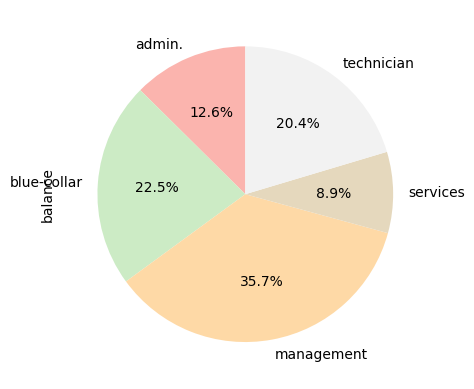

In [52]:
jobs_by_category = df_top_jobs.groupby("job")["balance"].sum()
jobs_by_category.plot(kind="pie", autopct='%1.1f%%', startangle=90, cmap="Pastel1")
plt.show()

/tmp/ipykernel_12836/4181149073.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=jobs_by_balance.values, y=jobs_by_balance.index, palette="pastel")


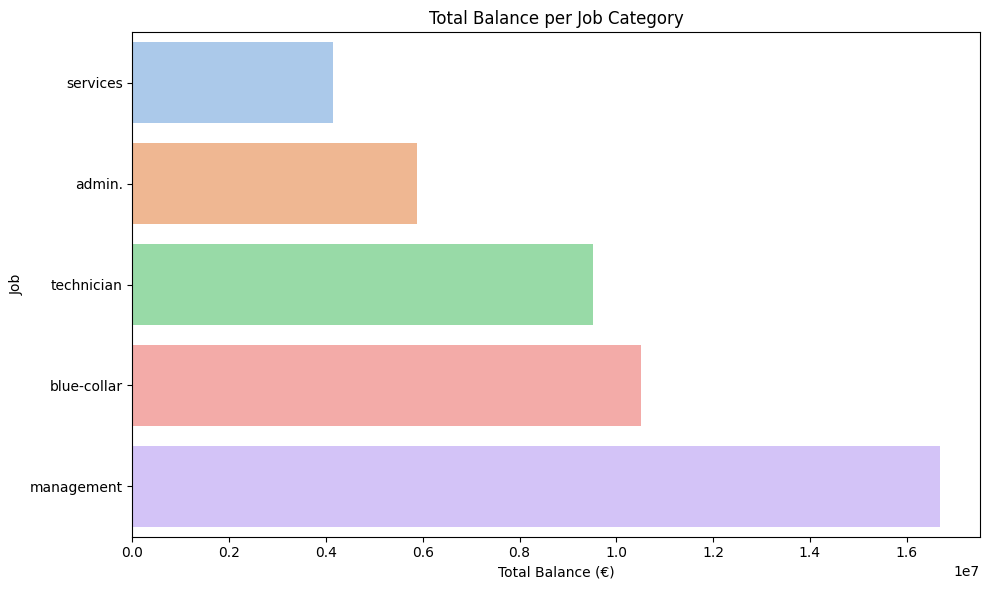

In [50]:
jobs_by_balance = df_top_jobs.groupby("job")["balance"].sum().sort_values()

# Plot as bar
plt.figure(figsize=(10, 6))
sns.barplot(x=jobs_by_balance.values, y=jobs_by_balance.index, palette="pastel")
plt.title("Total Balance per Job Category")
plt.xlabel("Total Balance (€)")
plt.ylabel("Job")
plt.tight_layout()
plt.show()

In [ ]:
sales_by_tier = prod_sales_df.groupby("Tier").agg({
    "NumberOfUnits": "sum",
    "InitialPrice": "mean"
}).rename(columns={"NumberOfUnits": "TotalUnitsSold", "InitialPrice": "AveragePrice"})
sales_by_tier